## FIFA19 Dataset Visualization: General Trends

In [12]:
# imports here
# 3rd party imports
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt

### Load Data

In [13]:
dat = pd.read_csv("../../../datasets/fifa19/data.csv")

In [6]:
col_names = list(dat.columns.values)
print(col_names[:5], col_names[-5:])

['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo'] ['GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause']


### Visualize Player Values

In [7]:
values = dat['Value']

# convert player values to sensible units
# remove euro sign
values = values.apply(lambda x: x[1:])
# convert M and K by their respective multipliers
values = values.apply(lambda x: float(x[:-1])*1e6 if "m" in x.lower() else (float(x[:-1])*1000 if "k" in x.lower() else float(x)))
counts = pd.cut(values, bins=5, labels=False, retbins=True)

In [8]:
print(type(counts))#, counts.shape, counts.name)
print(len(counts))
print(type(counts[0]), type(counts[1]))
print(counts[0].shape, counts[1].shape)
print(counts[1])

<class 'tuple'>
2
<class 'pandas.core.series.Series'> <class 'numpy.ndarray'>
(18207,) (6,)
[-1.185e+05  2.370e+07  4.740e+07  7.110e+07  9.480e+07  1.185e+08]


In [21]:
print(values.nlargest(1))

2    118500000.0
Name: Value, dtype: float64
False
False
0


118500000.0


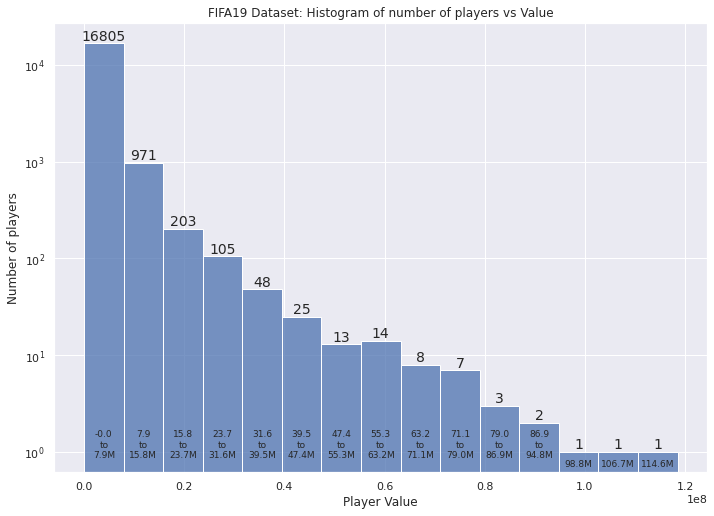

In [71]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
# ax = sn.boxplot(x='Value', y=counts, data=dat)
high = values.nlargest(1)
print(high.values[0])
ax = sns.histplot(data=values, stat="count", bins=15, binrange=(-0.1, high.values[0]+0.1), discrete=False, legend=True)
ax.set_yscale("log")
ax.set_xlabel("Player Value")
ax.set_ylabel("Number of players")
ax.set_title("FIFA19 Dataset: Histogram of number of players vs Value")

# loop through each patch
for p in ax.patches: 
    ax.text(p.get_x() + p.get_width()/2.,
            p.get_height(),
            '{}'.format(int(p.get_height())), 
            fontsize=14,
            ha='center',
            va='bottom')
    if p.get_height()/2. > 0.83:
        ax.text(p.get_x() + p.get_width()/2.,
            0.83,
            '{:.1f}\nto\n{:.1f}M'.format(p.get_x()/1e6, (p.get_x() + p.get_width())/1e6),
            fontsize=9,
            ha='center',
            va='bottom')
    else:
        ax.text(p.get_x() + p.get_width()/2.,
            0.67,
            '{:.1f}M'.format((p.get_x() + p.get_width()/2.)/1e6),
            fontsize=9,
            ha='center',
            va='bottom')